This notebook performs a preliminary analysis on the COVID-19 dataset from https://github.com/OxCGRT/covid-policy-tracker. 

Input file used: OxCGRT_latest_combined.csv

A Bayesian Network is created using the pgmpy package and performs inference using variable elimination.

#### Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_folder = "../data/raw/"
file_name = dataset_folder + "OxCGRT_latest_combined.csv"

In [3]:
df = pd.read_csv(file_name)
print(df.shape)
df.head()

/home/a/ajayago/.conda/envs/cs5340/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(251160, 58)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined_numeric,C1_combined,C2_combined_numeric,C2_combined,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251160 entries, 0 to 251159
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CountryName                        251160 non-null  object 
 1   CountryCode                        251160 non-null  object 
 2   RegionName                         101430 non-null  object 
 3   RegionCode                         101430 non-null  object 
 4   Jurisdiction                       251160 non-null  object 
 5   Date                               251160 non-null  int64  
 6   C1_combined_numeric                244941 non-null  float64
 7   C1_combined                        244941 non-null  object 
 8   C2_combined_numeric                244926 non-null  float64
 9   C2_combined                        244926 non-null  object 
 10  C3_combined_numeric                244875 non-null  float64
 11  C3_combined                        2448

In [6]:
no_of_countries = len(df.CountryName.unique())
print(f"Number of countries being analysed = {no_of_countries}")

Number of countries being analysed = 186


#### Processing the dataset

In [7]:
# Date column processing
df["Date_dd-mm-yyyy"] = df["Date"].astype(str).apply(lambda x: x[-2:] + "-" + x[-4:-2] + "-" + x[0:4])

In [8]:
pd.DataFrame(df.groupby("Date_dd-mm-yyyy")).iloc[0][1] # Example of the data collected on 01-01-2020

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined_numeric,C1_combined,C2_combined_numeric,C2_combined,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Date_dd-mm-yyyy
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
805,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
1610,Angola,AGO,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
2415,Albania,ALB,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
3220,Andorra,AND,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247135,Vanuatu,VUT,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
247940,Yemen,YEM,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
248745,South Africa,ZAF,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
249550,Zambia,ZMB,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020


In [9]:
# All countries in the dataset
df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Ko

In [21]:
numeric_features = df.filter(regex="[A-Z0-9a-z]*_combined_numeric$").columns # filtering out the _combined columns
features_df = df.drop(numeric_features, axis = 1)
print(features_df.shape)
features_df.head()

(251160, 39)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined,C2_combined,C3_combined,C4_combined,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Date_dd-mm-yyyy
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2020
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02-01-2020
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03-01-2020
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04-01-2020
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05-01-2020


In [22]:
features_df.isna().sum()

CountryName                               0
CountryCode                               0
RegionName                           149730
RegionCode                           149730
Jurisdiction                              0
Date                                      0
C1_combined                            6219
C2_combined                            6234
C3_combined                            6285
C4_combined                            6414
C5_combined                            6318
C6_combined                            6319
C7_combined                           10452
C8_combined                            6380
E1_combined                            6651
E2_combined                            6486
H1_combined                           10409
H2_combined                           10540
H3_combined                           10625
H6_combined                           10250
H7_combined                           10156
H8_combined                           10757
V1_combined                     

In [23]:
# Imputing missing values - might need a different strategy
features_df.fillna(0, inplace=True)

In [24]:
features_df["Date_year"] = features_df["Date_dd-mm-yyyy"].apply(lambda x: x.split("-")[2])
features_df["Date_month"] = features_df["Date_dd-mm-yyyy"].apply(lambda x: x.split("-")[1])
features_df["Date_date"] = features_df["Date_dd-mm-yyyy"].apply(lambda x: x.split("-")[0])

##### Analysis of C1_combined (School Closing)

The following section analyses the impact of C1_combined (School closing) amongst the countries - Malaysia, Singapore, Indonesia, India and China, in the year 2021.

In [38]:
countries = ["Malaysia", "Singapore", "Indonesia", "India", "China"]
df_2021 = features_df[(features_df.CountryName.isin(countries))&(features_df.Date_year == "2021")][["CountryName", "C1_combined", "Date_dd-mm-yyyy", "Date"]]
print(df_2021.shape)
df_2021.head()

(13140, 4)


,CountryName,C1_combined,Date_dd-mm-yyyy,Date
58326,China,1G,01-01-2021,20210101
58327,China,1G,02-01-2021,20210102
58328,China,1G,03-01-2021,20210103
58329,China,1G,04-01-2021,20210104
58330,China,1G,05-01-2021,20210105


In [39]:
df_2021['C1_combined'].value_counts()

1G    10177
2T     1163
3T     1103
3G      222
1T      211
2G      209
0        55
Name: C1_combined, dtype: int64

In [40]:
# combining categories in C1_combined 1G, 1T --> 1, 2T --> 2, 3T, 3G --> 3
def get_category(x):
    return int(x[0])
df_2021["C1_combined"] = df_2021["C1_combined"].apply(get_category)
df_2021["C1_combined"].value_counts()

1    10388
2     1372
3     1325
0       55
Name: C1_combined, dtype: int64

In [43]:
new_df = pd.DataFrame(columns = ["Date_dd-mm-yyyy", "Malaysia", "Singapore", "Indonesia", "India", "China"])
grouped_df = pd.DataFrame(df_2021.groupby("Date_dd-mm-yyyy"))
new_df["Date_dd-mm-yyyy"] = grouped_df[0]

In [50]:
grouped_df[grouped_df[0] == "01-01-2021"][1][0]

,CountryName,C1_combined,Date_dd-mm-yyyy,Date
58326,China,1,01-01-2021,20210101
59131,China,1,01-01-2021,20210101
59936,China,1,01-01-2021,20210101
60741,China,1,01-01-2021,20210101
61546,China,1,01-01-2021,20210101
62351,China,1,01-01-2021,20210101
63156,China,1,01-01-2021,20210101
63961,China,1,01-01-2021,20210101
64766,China,1,01-01-2021,20210101
65571,China,1,01-01-2021,20210101


In [51]:
def get_values(date, country):
    ndf_idx = grouped_df[grouped_df[0] == date][1].index[0]
    ndf = grouped_df[grouped_df[0] == date][1][ndf_idx]#.drop_duplicates() 
    # multiple rows are often present for a single country - one row for each region
    # another possible approach is to use most frequent value for the day
    # here, max value is returned, i.e. if China has 1 and 3 for the same day, 3 is returned
    l = list(ndf[ndf.CountryName == country]["C1_combined"])
    if len(l) == 1:
        return l[0]
    else:
        return max(l)

In [52]:
new_df["Malaysia"] = new_df["Date_dd-mm-yyyy"].apply(lambda date: get_values(date, "Malaysia"))
new_df["China"] = new_df["Date_dd-mm-yyyy"].apply(lambda date: get_values(date, "China"))
new_df["Indonesia"] = new_df["Date_dd-mm-yyyy"].apply(lambda date: get_values(date, "Indonesia"))
new_df["Singapore"] = new_df["Date_dd-mm-yyyy"].apply(lambda date: get_values(date, "Singapore"))
new_df["India"] = new_df["Date_dd-mm-yyyy"].apply(lambda date: get_values(date, "India"))

In [53]:
new_df

,Date_dd-mm-yyyy,Malaysia,Singapore,Indonesia,India,China
0,01-01-2021,3,1,2,3,3
1,01-02-2021,3,1,2,3,3
2,01-03-2021,2,1,3,2,2
3,01-04-2021,2,1,3,2,3
4,01-05-2021,3,1,3,3,3
...,...,...,...,...,...,...
360,31-05-2021,3,3,3,3,2
361,31-07-2021,3,1,3,2,3
362,31-08-2021,3,1,3,2,3
363,31-10-2021,2,1,1,2,3


In [54]:
set(new_df["Malaysia"].unique()) | set(new_df["China"].unique()) | set(new_df["India"].unique()) | set(new_df["Indonesia"].unique()) | set(new_df["Singapore"].unique())

{0, 1, 2, 3}

In [55]:
new_df = new_df.astype('str')

#### Bayesian Network Creation

In [56]:
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork
from ipywidgets import FloatProgress

In [57]:
!/home/a/ajayago/.conda/envs/cs5340/bin/pip install ipywidgets
!/home/a/ajayago/.conda/envs/cs5340/bin/jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


#### Learn network structure from data

This section uses the PC algorithm to learn the Bayesian network structure.

In [58]:
est = PC(data=new_df[["China", "India", "Malaysia", "Singapore", "Indonesia"]])
estimated_model = est.estimate(variant="stable", max_cond_vars=4) # can change the max_cond_vars value

  0%|          | 0/4 [00:00<?, ?it/s]

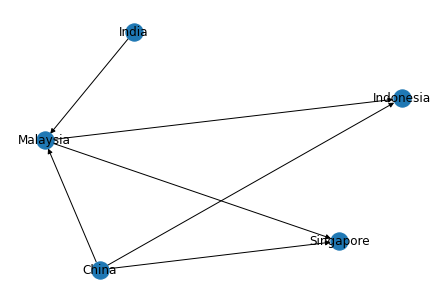

In [59]:
# Visualize the learnt network
import networkx as nx
nx.draw(estimated_model, with_labels=True)
plt.show()

In [60]:
estimated_model.get_independencies()

(Indonesia ⟂ India, Singapore | China, Malaysia)
(Indonesia ⟂ India | Malaysia, Singapore, China)
(Indonesia ⟂ Singapore | India, China, Malaysia)
(China ⟂ India)
(India ⟂ China)
(India ⟂ Indonesia, Singapore | China, Malaysia)
(India ⟂ Singapore | Indonesia, China, Malaysia)
(India ⟂ Indonesia | Singapore, China, Malaysia)
(Singapore ⟂ Indonesia, India | China, Malaysia)
(Singapore ⟂ India | Indonesia, China, Malaysia)
(Singapore ⟂ Indonesia | India, China, Malaysia)

In [61]:
estimated_model.get_markov_blanket(node="India")

['China', 'Malaysia']

#### Create our own network structure

In this section we define our own Bayesian network structure and use this for inferencing.

In [62]:
created_model = BayesianNetwork(
    [
        ("China", "Singapore"),
        ("India", "Singapore"),
        ("Indonesia", "Singapore"),
        ("Malaysia", "Singapore")
    ]
)

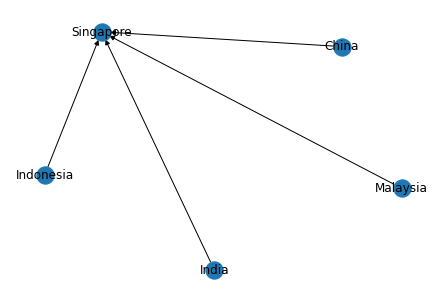

In [63]:
# Visualize the network
nx.draw(created_model, with_labels=True)
plt.show()

In [68]:
created_model.get_independencies()

(Indonesia ⟂ India, China, Malaysia)
(Indonesia ⟂ China, Malaysia | India)
(Indonesia ⟂ India, Malaysia | China)
(Indonesia ⟂ India, China | Malaysia)
(Indonesia ⟂ Malaysia | India, China)
(Indonesia ⟂ China | India, Malaysia)
(Indonesia ⟂ India | China, Malaysia)
(China ⟂ Indonesia, India, Malaysia)
(China ⟂ India, Malaysia | Indonesia)
(China ⟂ Indonesia, Malaysia | India)
(China ⟂ Indonesia, India | Malaysia)
(China ⟂ Malaysia | Indonesia, India)
(China ⟂ India | Indonesia, Malaysia)
(China ⟂ Indonesia | India, Malaysia)
(Malaysia ⟂ Indonesia, India, China)
(Malaysia ⟂ India, China | Indonesia)
(Malaysia ⟂ Indonesia, China | India)
(Malaysia ⟂ Indonesia, India | China)
(Malaysia ⟂ China | Indonesia, India)
(Malaysia ⟂ India | Indonesia, China)
(Malaysia ⟂ Indonesia | India, China)
(India ⟂ Indonesia, China, Malaysia)
(India ⟂ China, Malaysia | Indonesia)
(India ⟂ Indonesia, China | Malaysia)
(India ⟂ Indonesia, Malaysia | China)
(India ⟂ China | Indonesia, Malaysia)
(India ⟂ Malaysi

##### Parameter Estimation on created model

In [64]:
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(created_model, new_df[["China", "India", "Malaysia", "Singapore", "Indonesia"]])

In [65]:
created_model.fit(new_df[["China", "India", "Malaysia", "Singapore", "Indonesia"]], estimator = MaximumLikelihoodEstimator)

In [66]:
for cpd in created_model.get_cpds():
    print(cpd)


+----------+-----------+
| China(1) | 0.0575342 |
+----------+-----------+
| China(2) | 0.106849  |
+----------+-----------+
| China(3) | 0.835616  |
+----------+-----------+
+--------------+--------------------+-----+---------------------+
| China        | China(1)           | ... | China(3)            |
+--------------+--------------------+-----+---------------------+
| India        | India(0)           | ... | India(3)            |
+--------------+--------------------+-----+---------------------+
| Indonesia    | Indonesia(1)       | ... | Indonesia(3)        |
+--------------+--------------------+-----+---------------------+
| Malaysia     | Malaysia(0)        | ... | Malaysia(3)         |
+--------------+--------------------+-----+---------------------+
| Singapore(1) | 0.3333333333333333 | ... | 0.6285714285714286  |
+--------------+--------------------+-----+---------------------+
| Singapore(2) | 0.3333333333333333 | ... | 0.37142857142857144 |
+--------------+-----------------

##### Inferencing via Variable Elimination

In [67]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(created_model)

In [77]:
df[(df["Date_dd-mm-yyyy"]=="01-01-2022")&(df.CountryName.isin(["Singapore", "China", "India", "Malaysia", "Indonesia"]))][["CountryName", "C1_combined"]].tail()

,CountryName,C1_combined
83646,China,3T
122286,Indonesia,1G
123091,India,3T
156096,Malaysia,2T
178636,Singapore,1G


In [79]:
q = infer.query(variables = ['Singapore'], evidence = {"China": "3", "India": "3", "Indonesia": "1", "Malaysia": "2"})
print(q)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+--------------+------------------+
| Singapore    |   phi(Singapore) |
+==============+==================+
| Singapore(1) |           1.0000 |
+--------------+------------------+
| Singapore(2) |           0.0000 |
+--------------+------------------+
| Singapore(3) |           0.0000 |
+--------------+------------------+


As seen above, category 1 is what's predicted for Singapore when C1_combined is 3 in China and India, 2 in Malaysia and 1 in Indonesia.